This environment is part of the Classic Control environments. Please read that page first for general information.

Action Space   Discrete(2)  The output Discrete(2) means that there are two actions. In cartpole, 0 corresponds to "push   cart to the left" and 1 corresponds to "push cart to the right".

Observation Shape (4,)   cart position, cart velocity, cart angle, cart angular velocity

Observation High  [4.8 inf 0.42 inf]

Observation Low  [-4.8 -inf -0.42 -inf]

Import

gym.make("CartPole-v1")

Description
This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson in “Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem”. A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart.

Action Space
The action is a ndarray with shape (1,) which can take values {0, 1} indicating the direction of the fixed force the cart is pushed with.

Num Action

0

Push cart to the left

1

Push cart to the right

Note: The velocity that is reduced or increased by the applied force is not fixed and it depends on the angle the pole is pointing. The center of gravity of the pole varies the amount of energy needed to move the cart underneath it

Observation Space
The observation is a ndarray with shape (4,) with the values corresponding to the following positions and velocities:

Num

Observation

Min

Max

0

Cart Position

-4.8

4.8

1

Cart Velocity

-Inf

Inf

2

Pole Angle

~ -0.418 rad (-24°)

~ 0.418 rad (24°)

3

Pole Angular Velocity

-Inf

Inf

Note: While the ranges above denote the possible values for observation space of each element, it is not reflective of the allowed values of the state space in an unterminated episode. Particularly:

The cart x-position (index 0) can be take values between (-4.8, 4.8), but the episode terminates if the cart leaves the (-2.4, 2.4) range.

The pole angle can be observed between (-.418, .418) radians (or ±24°), but the episode terminates if the pole angle is not in the range (-.2095, .2095) (or ±12°)

Rewards
Since the goal is to keep the pole upright for as long as possible, a reward of +1 for every step taken, including the termination step, is allotted. The threshold for rewards is 475 for v1.

Starting State
All observations are assigned a uniformly random value in (-0.05, 0.05)

Episode End
The episode ends if any one of the following occurs:

Termination: Pole Angle is greater than ±12°

Termination: Cart Position is greater than ±2.4 (center of the cart reaches the edge of the display)

Truncation: Episode length is greater than 500 (200 for v0)

Arguments
gym.make('CartPole-v1')

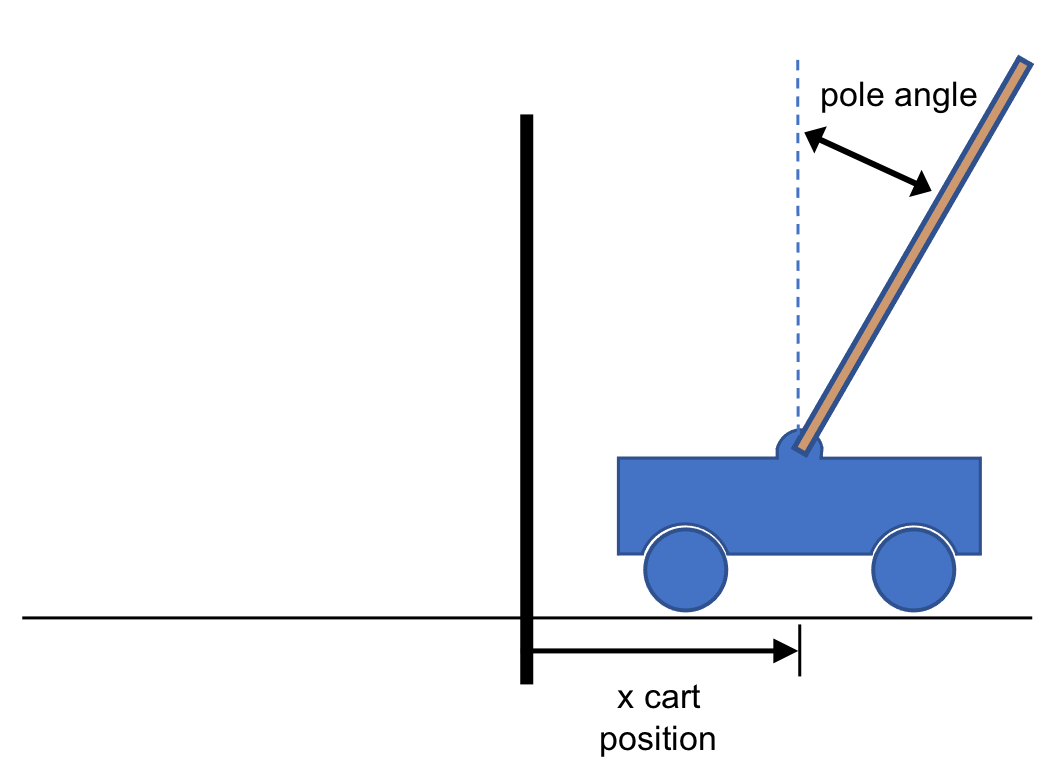

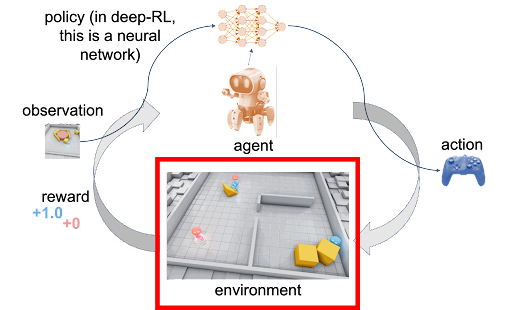

The diagram above shows the interactions and communications between an agent and an environment. In reinforcement learning, one or more agents interact within an environment which may be either a simulation like CartPole in this tutorial or a connection to real-world sensors and actuators. At each step, the agent receives an observation (i.e., the state of the environment), takes an action, and usually receives a reward (the frequency at which an agent receives a reward depends on a given task or problem). Agents learn from repeated trials, and a sequence of those is called an episode — the sequence of actions from an initial observation up to either a “success” or “failure” causing the environment to reach its “done” state. The learning portion of an RL framework trains a policy about which actions (i.e., sequential decisions) cause agents to maximize their long-term, cumulative rewards.

The problem we are trying to solve is trying to keep a pole upright. Specifically, the pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum starts upright, and the goal is to prevent it from falling over by increasing and reducing the cart's velocity

Rather than code this environment from scratch, this tutorial will use OpenAI Gym which is a toolkit that provides a wide variety of simulated environments (Atari games, board games, 2D and 3D physical simulations, and so on). Gym makes no assumptions about the structure of your agent (what pushes the cart left or right in this cartpole example), and is compatible with any numerical computation library, such as numpy.

The code below loads the cartpole environment.

In [2]:
import gym
env = gym.make("CartPole-v1")

In [3]:
env.action_space

Discrete(2)

The output Discrete(2) means that there are two actions. In cartpole, 0 corresponds to "push cart to the left" and 1 corresponds to "push cart to the right". Note that in this particular example, standing still is not an option. In reinforcement learning, the agent produces an action output and this action is sent to an environment which then reacts. The environment produces an observation (along with a reward signal, not shown here) which we can see below:

In [4]:
env.reset()

(array([-0.02101483, -0.02495217, -0.00142193,  0.0008959 ], dtype=float32),
 {})

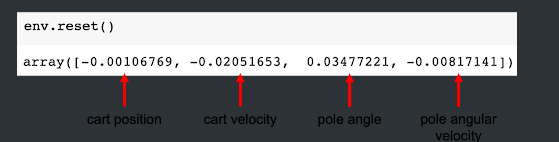

The observation is a vector of dim=4, containing the cart's x position, cart x velocity, the pole angle in radians (1 radian = 57.295 degrees), and the angular velocity of the pole. The numbers shown above are the initial observation after starting a new episode (`env.reset()`). With each timestep (and action), the observation values will change, depending on the state of the cart and pole.

Training an Agent
In reinforcement learning, the goal of the agent is to produce smarter and smarter actions over time. It does so with a policy. In deep reinforcement learning, this policy is represented with a neural network. Let's first interact with the RL gym environment without a neural network or machine learning algorithm of any kind. Instead we'll start with random movement (left or right). This is just to understand the mechanism

The code below resets the environment and takes 20 steps (20 cycles), always taking a random action and printing the results.

In [5]:
env.action_space.sample()

1

observation > cart position, cart velocity, pole angle, pole angular velocity

In [12]:
# returns an initial observation
env.reset()

for i in range(20):

  # env.action_space.sample() produces either 0 (left) or 1 (right).
  observation, reward, done_terminated, truncated, info = env.step(env.action_space.sample())

  print("step", i, observation, reward, done_terminated,truncated, info)

env.close()


step 0 [-0.03492034 -0.23156273 -0.02726367  0.31496048] 1.0 False False {}
step 1 [-0.03955159 -0.42628592 -0.02096446  0.5989222 ] 1.0 False False {}
step 2 [-0.04807732 -0.62110835 -0.00898602  0.8849286 ] 1.0 False False {}
step 3 [-0.06049948 -0.4258656   0.00871255  0.5894343 ] 1.0 False False {}
step 4 [-0.06901679 -0.6211084   0.02050124  0.88484895] 1.0 False False {}
step 5 [-0.08143896 -0.42627075  0.03819822  0.5986808 ] 1.0 False False {}
step 6 [-0.08996437 -0.2317035   0.05017183  0.31827036] 1.0 False False {}
step 7 [-0.09459845 -0.03733069  0.05653724  0.04182236] 1.0 False False {}
step 8 [-0.09534506  0.15693687  0.05737369 -0.23250028] 1.0 False False {}
step 9 [-0.09220632  0.35119408  0.05272368 -0.50654805] 1.0 False False {}
step 10 [-0.08518244  0.15537038  0.04259272 -0.19772708] 1.0 False False {}
step 11 [-0.08207504 -0.04033408  0.03863818  0.10808185] 1.0 False False {}
step 12 [-0.08288172 -0.23598781  0.04079982  0.4127002 ] 1.0 False False {}
step 13 [

Sample output. There are multiple conditions for episode termination in cartpole. In the image, the episode is terminated because it is over 12 degrees (0.20944 rad). Other conditions for episode termination are cart position is more than 2.4 (center of the cart reaches the edge of the display), episode length is greater than 200, or the solved requirement which is when the average return is greater than or equal to 195.0 over 100 consecutive trials.

The printed output above shows the following things: 

step (how many times it has cycled through the environment). In each timestep, an agent chooses an action, and the environment returns an observation and a reward

observation of the environment [x cart position, x cart velocity, pole angle (rad), pole angular velocity]

reward achieved by the previous action. The scale varies between environments, but the goal is always to increase your total reward. The reward is 1 for every step taken for cartpole, including the termination step. After it is 0 (step 18 and 19 in the image).

done is a boolean. It indicates whether it's time to reset the environment again. Most tasks are divided up into well-defined episodes, and done being True indicates the episode has terminated. In cart pole, it could be that the pole tipped too far (more than 12 degrees/0.20944 radians), position is more than 2.4 meaning the center of the cart reaches the edge of the display, episode length is greater than 200, or the solved requirement which is when the average return is greater than or equal to 195.0 over 100 consecutive trials.

info which is diagnostic information useful for debugging. It is empty for this cartpole environment.

In [10]:
# from pyvirtualdisplay import Display
# display = Display(visible=False, size=(1400, 900))
# _ = display.start()

In [14]:
from gym.wrappers.monitoring.video_recorder import VideoRecorder
before_training = "before_training.mp4"

video = VideoRecorder(env, before_training)
# returns an initial observation
env.reset()
for i in range(200):
  env.render()
  video.capture_frame()
  # env.action_space.sample() produces either 0 (left) or 1 (right).
  observation, reward, done_terminated, truncated, info = env.step(env.action_space.sample())
  # Not printing this time
  #print("step", i, observation, reward, done, info)

video.close()
env.close()

d:\a27_YEARS_OLD\deep_learning\venv\Lib\site-packages\gym\wrappers\monitoring\video_recorder.py:59: UserWarning: WARN: Disabling video recorder because environment <TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>> was not initialized with any compatible video mode between `rgb_array` and `rgb_array_list`
  logger.warn(
d:\a27_YEARS_OLD\deep_learning\venv\Lib\site-packages\gym\envs\classic_control\cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


In [15]:
from base64 import b64encode
def render_mp4(videopath: str) -> str:
  """
  Gets a string containing a b4-encoded version of the MP4 video
  at the specified path.
  """
  mp4 = open(videopath, 'rb').read()
  base64_encoded_mp4 = b64encode(mp4).decode()
  return f'<video width=400 controls><source src="data:video/mp4;' \
         f'base64,{base64_encoded_mp4}" type="video/mp4"></video>'

In [16]:
from IPython.display import HTML
html = render_mp4(before_training)
HTML(html)

FileNotFoundError: [Errno 2] No such file or directory: 'before_training.mp4'

Proportional Integral Derivative (PID) control algorithm. This video is given below the figure.

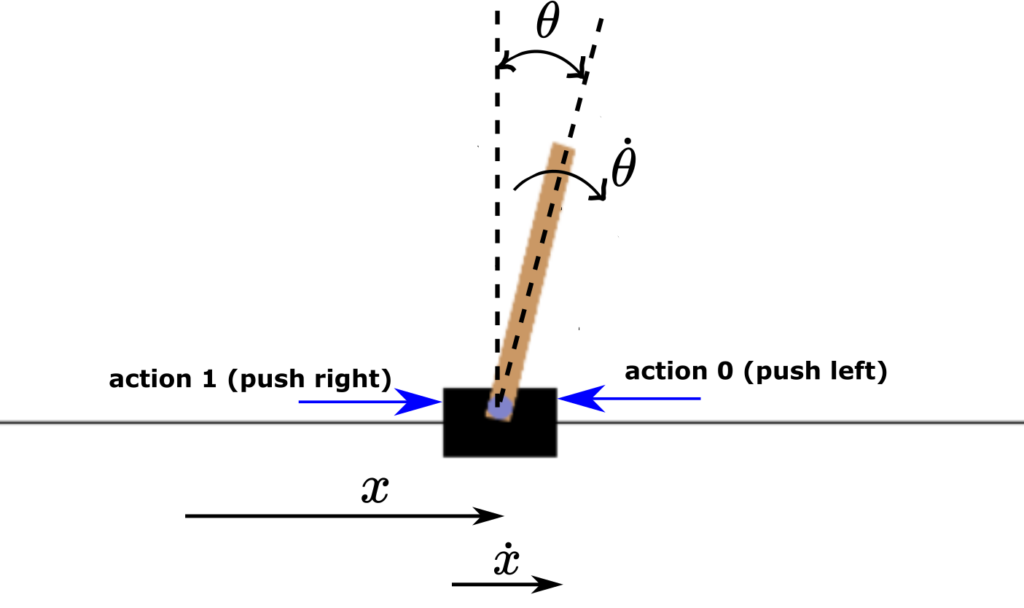

In [17]:

# render the environment
env.render()
# close the environment
#env.close()
 
# push cart in one direction
env.step(0)

(array([ 4.845766 ,  2.097012 , -0.5821412, -1.4054527], dtype=float32),
 0.0,
 True,
 False,
 {})

In [20]:
# observation space limits
env.observation_space
 

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [21]:

# upper limit
env.observation_space.high

array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)

In [22]:
# lower limit
env.observation_space.low
 

array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32)

In [23]:
 
# action space
env.action_space

Discrete(2)

In [24]:
 
# all the specs
env.spec
 

EnvSpec(id='CartPole-v1', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={}, namespace=None, name='CartPole', version=1)

In [25]:

# maximum number of steps per episode
env.spec.max_episode_steps

500

In [26]:

 
# reward threshold per episode
env.spec.reward_threshold


475.0

475.0

In [27]:
import time

In [28]:
# simulate the environment
episodeNumber=5
timeSteps=100
 
 
for episodeIndex in range(episodeNumber):
    initial_state=env.reset()
    print(episodeIndex)
    env.render()
    appendedObservations=[]
    for timeIndex in range(timeSteps):
        print(timeIndex)
        random_action=env.action_space.sample()
        observation, reward, terminated, truncated, info =env.step(random_action)
        appendedObservations.append(observation)
        time.sleep(0.1)
        if (terminated):
            time.sleep(1)
            break
env.close()   

0
0
1
2


d:\a27_YEARS_OLD\deep_learning\venv\Lib\site-packages\gym\envs\classic_control\cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
1
0
1
2
3
4
5
6
7
8
9
10
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
